# CANIDOTHAT?

## Allpass filter - used as a cool audio effect


In [1]:
# Imports
import numpy as np
import signal as sig
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.fft import fft
from scipy.io.wavfile import write

(-1.111, 1.111, -1.0994348378207568, 1.1225651621792432)

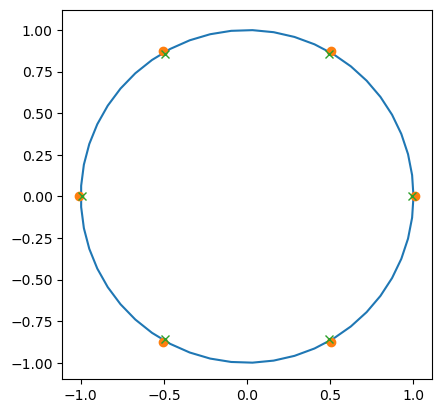

In [2]:
# Some parameters
fs = 44100


# number of zeros/poles and distance of zeros from origin - used to equally space on unit circle (distance of poles will be inverted)
nr_ploles_zeros = 6
r_zeros = 1.01

# zeros in polar 
zrs = r_zeros * np.exp(1j*np.linspace(0,2*np.pi, nr_ploles_zeros, endpoint=False) )
pls = 1/r_zeros * np.exp(1j*np.linspace(0,2*np.pi, nr_ploles_zeros, endpoint=False) )

#print(zrs)
# poles -

#sig.zplane(zrs, zrs)
plt.plot(np.cos(np.linspace(0,2*np.pi)), np.sin(np.linspace(0,2*np.pi)))
plt.plot(np.real(zrs), np.imag(zrs),'o')
plt.plot(np.real(pls), np.imag(pls),'x')
plt.axis('square')

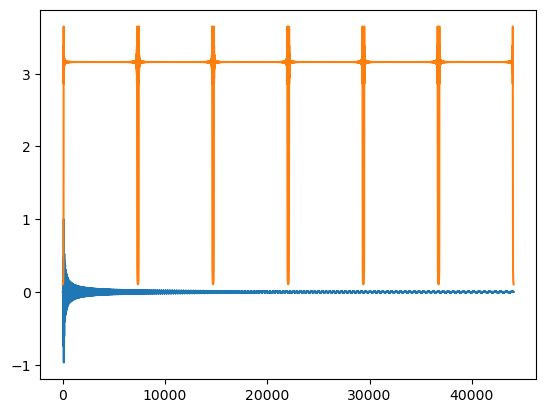

In [3]:
# Get filter coefficients
A = np.real(np.poly(pls))
B = np.real(np.poly(zrs))

# Get impulse response
imp = np.zeros(fs)
imp[0] = 1

ir = lfilter(B, A, imp)

# iterate thorough convolutions
nr_iter = 500
kk = 1
while kk < nr_iter:
    ir = lfilter(B,A, ir)
    ir = ir/np.max(ir)
    kk+=1
    #print(kk)

# plot IT
#
plt.plot(ir)

Y = fft(ir)
plt.plot(abs(Y))



In [4]:
# Normalize and get into .wav

amplitude = np.iinfo(np.int16).max

ir = ir/np.max(ir)*amplitude*.8

write("../../wav/canidothat_allpass.wav", fs, ir.astype(np.int16))


26.0
16537
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


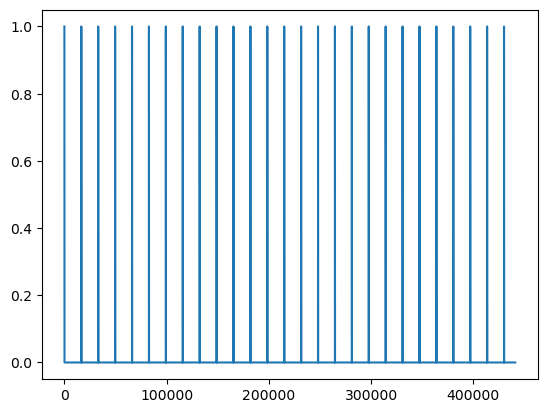

In [5]:
# do some cool techno-vibe stuff

#pulse train variables
BPM = 160
T_train = 10

N_pulses = T_train * (BPM/60)
print(np.fix(N_pulses))

delta_idx = int((1/(BPM/60))*fs)
print(delta_idx)

pulse_train = np.zeros(T_train*fs)

# Raise pulses
pulse_nr = 1

while pulse_nr <= N_pulses+1:
    pulse_train[(pulse_nr-1) * delta_idx ] = 1
    pulse_nr += 1
    print(pulse_nr)

plt.plot(pulse_train)    


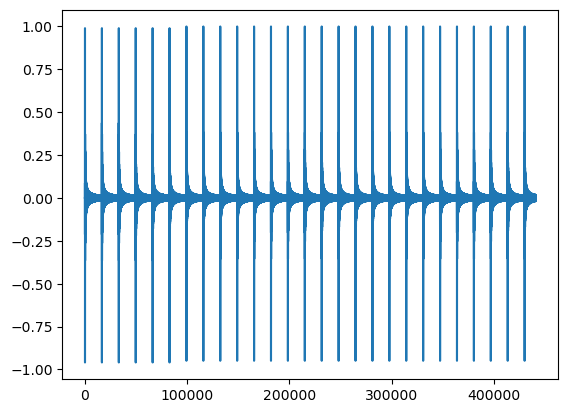

In [6]:
# Filter through allpass
pulse_train_filt = lfilter(B,A, pulse_train)

# iterate thorough convolutions
nr_iter = 500
kk = 1
while kk < nr_iter:
    pulse_train_filt = lfilter(B,A, pulse_train_filt)
    pulse_train_filt = pulse_train_filt/np.max(pulse_train_filt)
    kk+=1


plt.plot(pulse_train_filt)    

In [7]:
# save into .wav

pulse_train_filt = pulse_train_filt/np.max(pulse_train_filt)*amplitude*.8
pulse_train = pulse_train/np.max(pulse_train)*amplitude*.8

write("../../wav/canidothat_train.wav", fs, pulse_train.astype(np.int16))
write("../../wav/canidothat_allpass_train.wav", fs, pulse_train_filt.astype(np.int16))